Word2Vec model to generate Word embeddings for the words

In [58]:
# Genism
from gensim.models import Word2Vec
from smart_open import open
import os

# Tensor
import tensorflow as tf
from tensorflow import keras

#plotting
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#csv
import csv

# NLTK
import numpy as np 
import re
import string 
import nltk
from nltk.corpus import stopwords , brown

In [59]:
tf.reset_default_graph()

In [60]:
# File open & Read
#use data/para.txt for testing and abstract.txt for using corpus data
with open('data/para.txt', 'r') as file:
    para = file.read().replace('\n', '')
# file.seek(0,0)

In [61]:
# scentences to tokens
# used for para to tokens
def preprocessing(corpus): 
    stop_words = set(stopwords.words('english'))     
    training_data = [] 
    sentences = corpus.split(".") 
    for i in range(len(sentences)): 
        sentences[i] = sentences[i].strip() 
        sentence = sentences[i].split() 
        x = [word.strip(string.punctuation) for word in sentence 
                                     if word not in stop_words] 
        x = [word.lower() for word in x] 
        training_data.append(x) 
    return training_data 

# function call
para = preprocessing(para)

In [62]:
DIM = 300

# Word to Vec model || genism
def model(itera):
    model = Word2Vec(para, min_count=1, size=DIM, sg = 1 , iter=itera)
    return model
w2v = model(100)

In [63]:
# existing vocabalary
num_regex = re.compile('\d')
vocab = []
vocab_occurences = []
for l1,l2 in w2v.wv.vocab.items():
    if len(l1.strip()) == 0 or num_regex.search(l1):
        continue
    else:
        vocab.append(l1)
        vocab_occurences.append(l2.count)

In [64]:
# Saving model
w2v.save("w2v.model")

In [65]:
embeddings = w2v[w2v.wv.vocab]
embeddings = embeddings.tolist()

#writing vocab.tsv and vectors.tsv
list_num = [i+1 for i in range(len(embeddings[0]))]
fw1 = open('data/vectors.tsv', 'wt')
fw2 = open('data/vocab.tsv', 'wt')
tsv_writer1 = csv.writer(fw1, delimiter='\t')
tsv_writer2 = csv.writer(fw2, delimiter='\t')
tsv_writer1.writerow(list_num)
tsv_writer2.writerow(['words','occurences'])
for i,word in enumerate(vocab):
    tsv_writer1.writerow(embeddings[i])
    tsv_writer2.writerow([word, vocab_occurences[i]]) 

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [66]:
# testing
# similar by word
w2v.most_similar("dynactin")[:10]

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('isoforms', 0.9998464584350586),
 ('shown', 0.9998341202735901),
 ('phenotype', 0.9998329281806946),
 ('recently', 0.9998325109481812),
 ('4', 0.9998306035995483),
 ('extreme', 0.9998286366462708),
 ('design', 0.9998250603675842),
 ('influence', 0.9998114109039307),
 ('may', 0.9997940063476562),
 ('respiratory', 0.9997925162315369)]

Generating training file for tags

In [32]:
#opening file (tag file)
with open('data/data.txt', 'r') as file:
    tag = file.read()
# file.seek(0,0)
str = tag.split("\n")
str

['63772\t0\t5\tDCTN4\tT116,T123\tC4308010',
 '25763772\t23\t63\tchronic Pseudomonas aeruginosa infection\tT047\tC0854135',
 '25763772\t67\t82\tcystic fibrosis\tT047\tC0010674',
 '25763772\t83\t120\tPseudomonas aeruginosa (Pa) infection\tT047\tC0854135',
 '25763772\t124\t139\tcystic fibrosis\tT047\tC0010674',
 '25763772\t141\t143\tCF\tT047\tC0010674',
 '25763772\t145\t153\tpatients\tT101\tC0030705',
 '25763772\t179\t188\tlong-term\tT079\tC0443252',
 '25763772\t189\t206\tpulmonary disease\tT047\tC0024115',
 '25763772\t211\t227\tshorter survival\tT169\tC0220921',
 '25763772\t233\t253\tchronic Pa infection\tT047\tC0854135',
 '25763772\t255\t258\tCPA\tT047\tC0854135',
 '25763772\t279\t300\treduced lung function\tT033\tC0847557',
 '25763772\t302\t329\tfaster rate of lung decline\tT033\tC3160731',
 '25763772\t341\t346\trates\tT081\tC1521828',
 '25763772\t350\t363\texacerbations\tT033\tC4086268',
 '25763772\t368\t384\tshorter survival\tT169\tC0220921',
 '25763772\t395\t411\texome sequencing\tT

In [33]:
#processing data -2
def preprocessing1(corpus):
    training_data = []
    for i in str:
        i = i.split()
        i.pop(0)
        i.pop(0)
        i.pop(0)
        i.pop(-1)
        i = [word.lower() for word in i]
        for el in range(len(i)-1):
            l2 = [i[el],i[len(i)-1]]
            training_data.append(tuple(l2)) 
    return training_data
tag = preprocessing1(str)

#dictionary format of dicts
tag_dict = {il[0]:il[1] for il in tag}
tag_dict

{'dctn4': 't116,t123',
 'chronic': 't047',
 'pseudomonas': 't047',
 'aeruginosa': 't047',
 'infection': 't047',
 'cystic': 't047',
 'fibrosis': 't047',
 '(pa)': 't047',
 'cf': 't047',
 'patients': 't101',
 'long-term': 't079',
 'pulmonary': 't047',
 'disease': 't047',
 'shorter': 't169',
 'survival': 't169',
 'pa': 't047',
 'cpa': 't047',
 'reduced': 't033',
 'lung': 't033',
 'function': 't033',
 'faster': 't033',
 'rate': 't033',
 'of': 't033',
 'decline': 't033',
 'rates': 't081',
 'exacerbations': 't033',
 'exome': 't063',
 'sequencing': 't063',
 'extreme': 't052',
 'phenotype': 't052',
 'design': 't052',
 'isoforms': 't116',
 'dynactin': 't116,t123',
 '4': 't116,t123',
 'respiratory': 't047',
 'study': 't062',
 'investigate': 't169',
 'missense': 't033',
 'variants': 't116',
 'incidence': 't081',
 'age': 't032',
 'cohort': 't098',
 'adult': 't100',
 'centre': 't073,t093',
 'polymerase': 't063',
 'chain': 't063',
 'reaction': 't063',
 'direct': 't063',
 'dna': 't026',
 'samples': 't

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


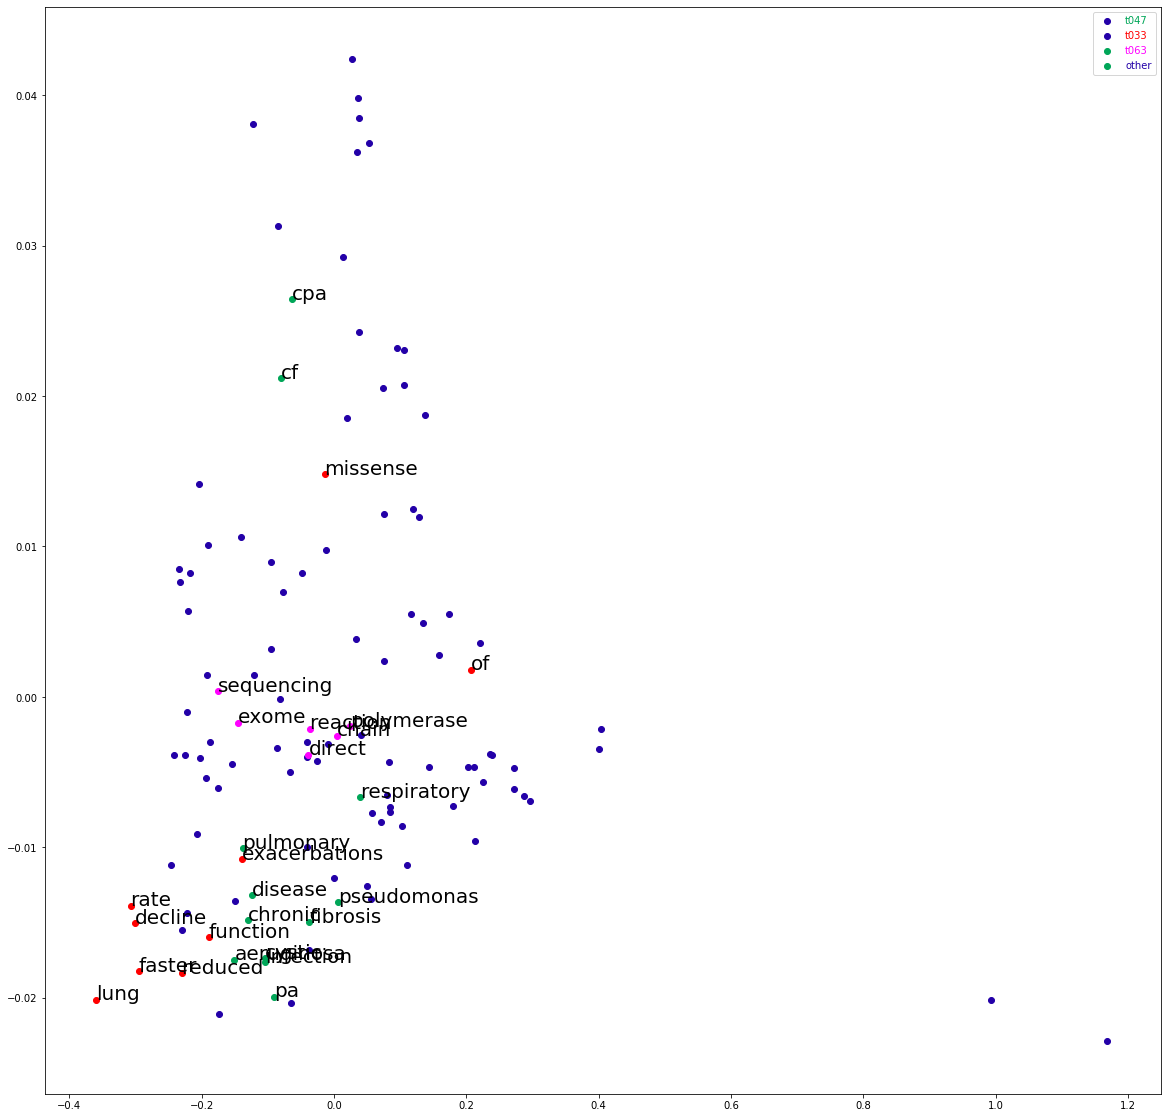

In [34]:
targets = ['t047','t033','t063','other']
colors = ['#00A658','#FF0000','#FF00FF','#2300A8']
colours = ['g','r','b']

# To get the color to be displayed
def get_color(word):
    value = tag_dict.get(word, "o")
    for i in range(len(targets)):
        if value == targets[i]:
            break;
    return i

# PCA plotting for model
X = w2v[w2v.wv.vocab]
pca = PCA()
result = pca.fit_transform(X)

# create a scatter plot of the projection
f,ax = plt.subplots(figsize = (20,20))

words = list(w2v.wv.vocab)
for i, word in enumerate(words):
    j = get_color(word)
    ax.scatter(result[i, 0], result[i, 1],color=colors[j])
    if j<(len(targets)-1):
        ax.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize = 20)

leg = ax.legend(targets)

for color,text in zip(colors,leg.get_texts()):
    text.set_color(color)
plt.show()

^^^^Make this change ^^^^
['dynactin 4', 't116,t123']   =====>>>>> [['dynactin 4', 't116'],['dynactin 4', 't123']]

POS (Part of Speech model)

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


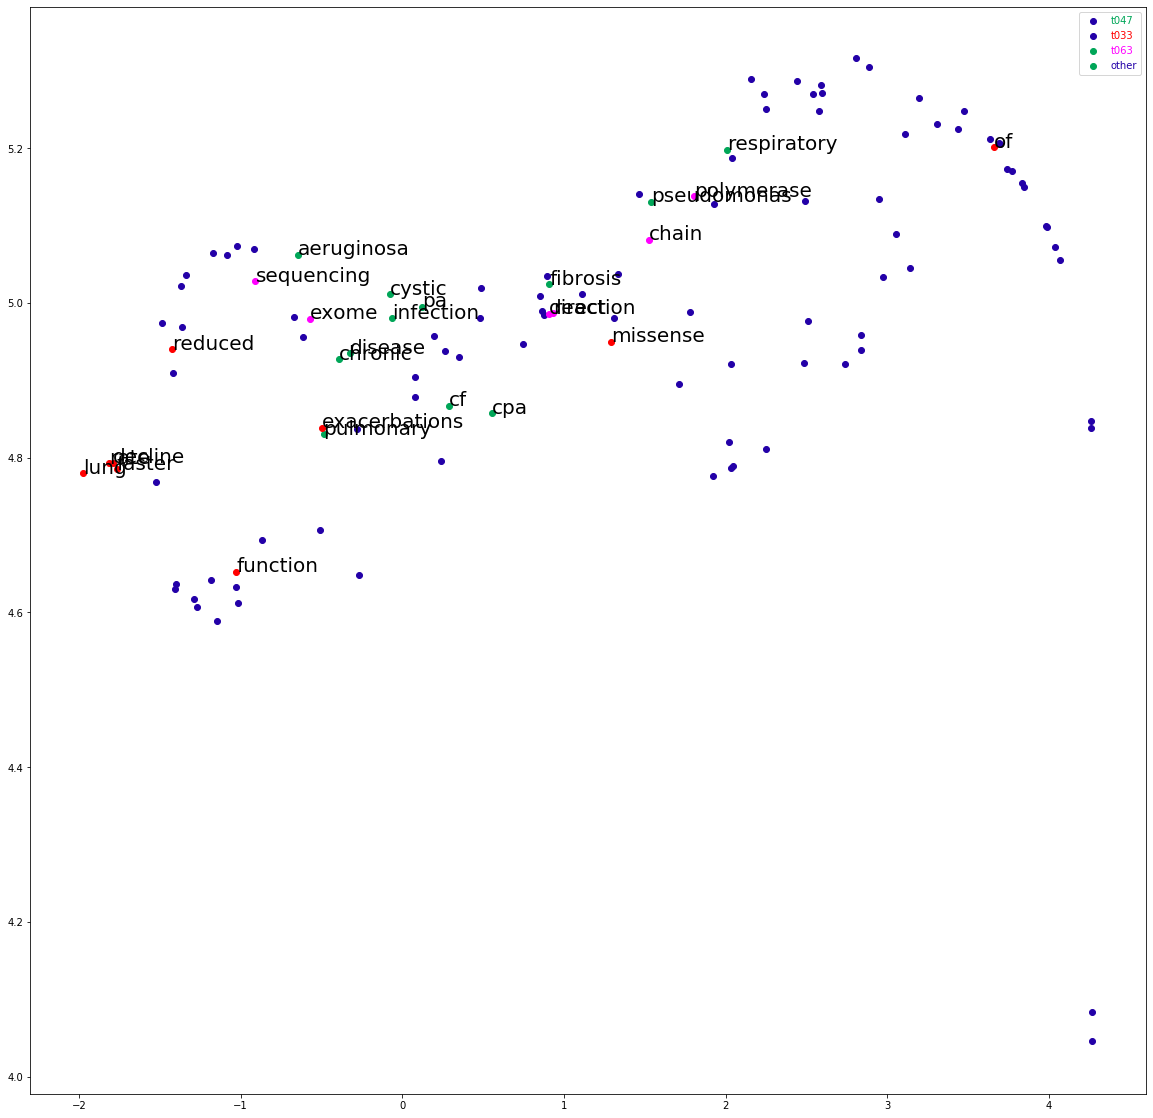

In [13]:
# To get the color to be displayed
def get_color(word):
    value = tag_dict.get(word, "o")
    for i in range(len(targets)):
        if value == targets[i]:
            break;
    return i

# PCA plotting for model
X = w2v[w2v.wv.vocab]
tsne = TSNE(perplexity=70.0,n_iter=5000)
result = tsne.fit_transform(X)

# create a scatter plot of the projection
f,ax = plt.subplots(figsize = (20,20))

words = list(w2v.wv.vocab)
for i, word in enumerate(words):
    j = get_color(word)
    ax.scatter(result[i, 0], result[i, 1],color=colors[j])
    if j<(len(targets)-1):
        ax.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize = 20)

leg = ax.legend(targets)

for color,text in zip(colors,leg.get_texts()):
    text.set_color(color)
plt.show()

In [ ]:
embeddings = w2v[w2v.wv.vocab]
print(embeddings.shape)

Bi-LSTM CRF model

In [ ]:
def get_tag_vocab(tagged_words):
    tag2id={}
    for item in tagged_words:
        tag = item[1]
        tag2id.setdefault(tag, len(tag2id))
    return tag2id
word2id = {k: z.index for k, z in w2v.wv.vocab.items()}
tag2id = get_tag_vocab(tag)


In [ ]:
word2id

In [16]:
tag2id

{'t116,t123': 0,
 't047': 1,
 't101': 2,
 't079': 3,
 't169': 4,
 't033': 5,
 't081': 6,
 't063': 7,
 't052': 8,
 't116': 9,
 't062': 10,
 't032': 11,
 't098': 12,
 't100': 13,
 't073,t093': 14,
 't026': 15,
 't028': 16,
 't007': 17,
 't045': 18,
 't046': 19}

In [17]:
for l1, l2 in w2v.wv.vocab.items():
    print(l1, l2)

#modifier Vocab(count:1, index:35, sample_int:2861157653)
#chronic Vocab(count:3, index:8, sample_int:1432848787)
#pseudomonas Vocab(count:1, index:36, sample_int:2861157653)

25763772|t|dctn4 Vocab(count:1, index:34, sample_int:2861157653)
modifier Vocab(count:1, index:35, sample_int:2861157653)
chronic Vocab(count:3, index:8, sample_int:1432848787)
pseudomonas Vocab(count:1, index:36, sample_int:2861157653)
aeruginosa Vocab(count:2, index:13, sample_int:1837234957)
infection Vocab(count:10, index:2, sample_int:710681036)
cystic Vocab(count:2, index:14, sample_int:1837234957)
fibrosis25763772|a|pseudomonas Vocab(count:1, index:37, sample_int:2861157653)
pa Vocab(count:9, index:3, sample_int:754241848)
fibrosis Vocab(count:1, index:38, sample_int:2861157653)
cf Vocab(count:11, index:1, sample_int:673624765)
patients Vocab(count:12, index:0, sample_int:641620380)
associated Vocab(count:2, index:15, sample_int:1837234957)
worse Vocab(count:2, index:16, sample_int:1837234957)
long-term Vocab(count:1, index:39, sample_int:2861157653)
pulmonary Vocab(count:2, index:17, sample_int:1837234957)
disease Vocab(count:2, index:18, sample_int:1837234957)
shorter Vocab(co

In [18]:
# Check it up in GK's code. same variable v in model.py in model_fn
#v = np.vstack([embeddings])



In [19]:
# Writing to a tsv file #####    1


keys = list(word2id.keys())
value = list(word2id.values())
with open('data/words.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['Word','vector'])
    for key , val in zip(keys, value):
        tsv_writer.writerow([key, val])
    out_file.close()

In [20]:
# Writing to a tsv file ######    2


keys = list(word2id.keys())
value = list(word2id.values())
with open('data/words.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['Word'])
    for key in keys:
        tsv_writer.writerow([key])
    out_file.close()

In [21]:
vocab_words = tf.contrib.lookup.index_table_from_file("words.tsv", num_oov_buckets=1)
vocab_words

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [22]:
words=[]
for w in keys:
    words.append(w.encode())
words = tf.Variable(words, dtype = tf.string , trainable = False)
word_ids = vocab_words.lookup(words)
word_ids

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<tf.Tensor 'hash_table_Lookup/Select:0' shape=(118,) dtype=int64>

In [23]:
v = np.vstack([embeddings, [[0]*300]])
v = tf.Variable(v, dtype=tf.float32, trainable=False)

pretrained_embeddings = tf.nn.embedding_lookup(v, word_ids)
dropout = 0.5
pretrained_embeddings = tf.layers.dropout(pretrained_embeddings, rate = dropout, training= True)
pretrained_embeddings  
# refer https://github.com/guillaumegenthial/tf_ner/blob/e9bca45c7a3d73e1b7ee5ce12ff4f33e4598f9d9/models/chars_lstm_lstm_crf/main.py#L122  for more info

Instructions for updating:
Use keras.layers.dropout instead.


<tf.Tensor 'dropout/dropout/mul_1:0' shape=(118, 300) dtype=float32>

In [24]:
t = tf.transpose(pretrained_embeddings, perm=[1,0])
t

<tf.Tensor 'transpose:0' shape=(300, 118) dtype=float32>

In [25]:
lstm_cell_fw = tf.contrib.rnn.LSTMBlockFusedCell(100)
lstm_cell_bw = tf.contrib.rnn.LSTMBlockFusedCell(100)
lstm_cell_bw = tf.contrib.rnn.TimeReversedFusedRNN(lstm_cell_bw)

In [26]:
output_fw, _ = lstm_cell_fw(t, dtype=tf.float32, sequence_length=118)
output_bw, _ = lstm_cell_bw(t, dtype=tf.float32, sequence_length=118)

ValueError: Input 0 of layer lstm_fused_cell is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [300, 118]

In [ ]:
output = tf.concat([output_fw, output_bw], axis=-1)
output = tf.transpose(output, perm=[1, 0])